In [172]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import triang

In [201]:
class NeuralNetworks:
    def __init__(self, weights=np.array([0., 0., 0., 0., 0.]), activation_function=lambda x: x):
        self.weights = weights
        self.activation_function = activation_function
        self.df = lambda x: 1
        self.nu = 0.3
        self.border = 0

    def get_net(self, x):
        return self.weights[0] + self.weights[1] * x[0] + self.weights[2] * x[1] + self.weights[3] * x[1] * x[1] + \
            self.weights[4] * x[1] * x[1] * x[1]

    def predict(self, x):
        predicts = []
        for i in x:
            predicts.append(1 if self.activation_function(self.get_net(i)) >= self.border else 0)
        return predicts

    def fit(self, x, y, epochs=10):
        errors = []
        table = PrettyTable()
        table.field_names = ['k', 'weights', 'y', 'Error']
        t = self.predict(x)
        error = 1 * (t - y)
        error_count = np.count_nonzero(error)
        errors.append(error_count)
        w = np.copy(self.weights)
        table.add_row([0, w, t, error_count])
        for k in range(1, epochs + 1):
            w = np.copy(self.weights)
            for i, el in enumerate(x):
                net = self.get_net(el)
                _df = self.df(net)
                w[0] = w[0] - self.nu * error[i]
                w[1] = w[1] - self.nu * error[i] * el[0]
                w[2] = w[2] - self.nu * error[i] * el[1]
                w[3] = w[3] - self.nu * error[i] * el[1] * el[1]
                w[4] = w[4] - self.nu * error[i] * el[1] * el[1] * el[1]
            self.weights = w
            t = self.predict(x)
            error = 1 * (t - y)
            error_count_prev = error_count
            error_count = np.count_nonzero(error)
            errors.append(error_count)
            table.add_row([k, w, t, error_count])
        plt.plot(range(1, len(errors) + 1), errors)
        print(table)

In [299]:
import numpy as np
from scipy.stats import triang

# Генерация выборки для класса "Свой"
def generate_own_samples():
    x = triang.rvs(c=0.5, loc=0, scale=6, size=300)
    y = triang.rvs(c=0.5, loc=0, scale=6, size=300)
    return np.column_stack((x, y))

# Генерация выборки для подкласса "Чужой-1"
def generate_foreign1_samples():
    x1 = triang.rvs(c=0.5, loc=6, scale=12, size=500)
    y1 = triang.rvs(c=0.5, loc=0, scale=6, size=500)
    return np.column_stack((x1, y1))

# Генерация выборки для подкласса "Чужой-2"
def generate_foreign2_samples():
    x2 = triang.rvs(c=0.5, loc=0, scale=6, size=400)
    y2 = triang.rvs(c=0.5, loc=-6, scale=6, size=400)
    return np.column_stack((x2, y2))


In [300]:
# Визуализация выборок
def plot_samples(own_samples, foreign_samples, k):
    plt.scatter(foreign_samples[:, 0], foreign_samples[:, 1], color='red', label='Чужой')
    plt.scatter(own_samples[:, 0], own_samples[:, 1], color='blue', label='Свой')
    if len(k) != 0:
        y = np.arange(-4, 5)
        x = k[0] + k[1] * y + k[2] * y * y + k[3] * y * y * y
        plt.plot(x, y, linestyle='--')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

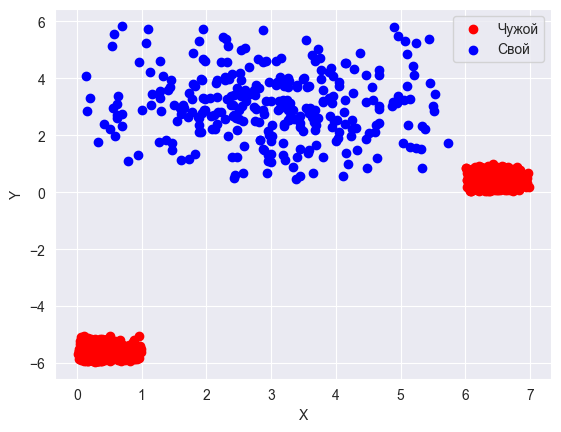

In [301]:
# Генерация выборок
own_samples = generate_own_samples()
foreign_samples = generate_foreign_samples()

plot_samples(own_samples, foreign_samples, [])

In [302]:
def get_train_data(data):
    inds = np.random.choice(len(data), 100)
    train_data = np.array([data[i] for i in inds])
    return train_data

In [303]:
train_x1 = get_train_data(own_samples)
train_x2 = get_train_data(foreign_samples)
train_x = np.concatenate([train_x1, train_x2])
train_y = np.concatenate([np.ones(100), np.zeros(100)])

+----+-------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+
| k  |                                 weights                                 |                                                                                                                                                                                                                                    

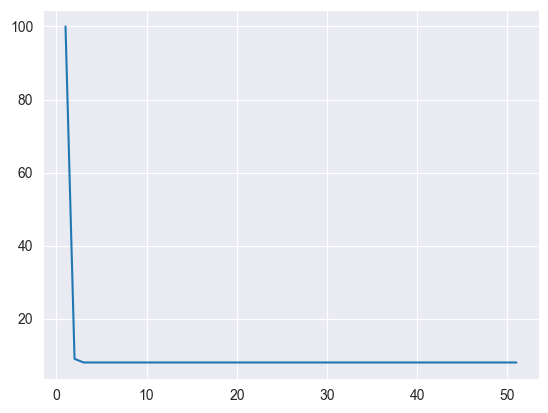

In [308]:
net = NeuralNetworks()
net.fit(train_x, train_y, epochs=50)

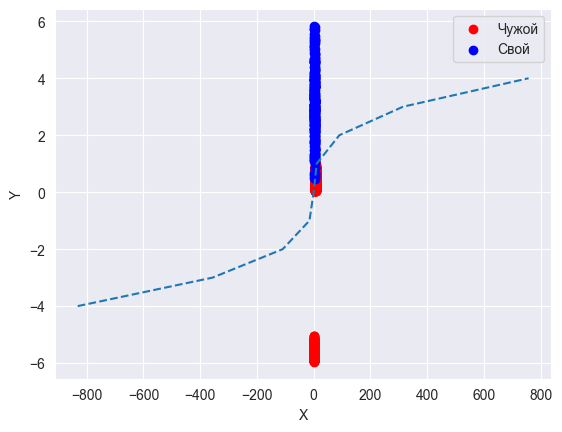

In [309]:
k = [net.weights[0], net.weights[2], net.weights[3], net.weights[4]]
k = k / net.weights[1] * -1
plot_samples(own_samples, foreign_samples, k)

[[886  14]
 [  6 294]]


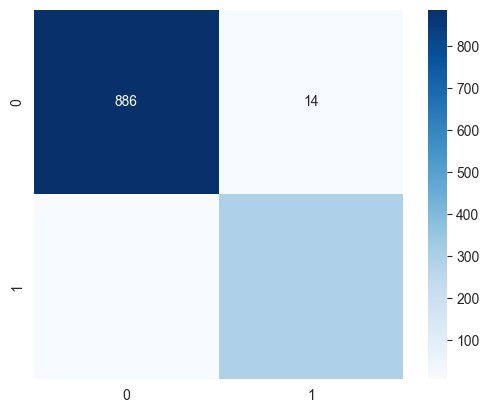

In [310]:
from sklearn import metrics

predictions_own = net.predict(own_samples)

predictions_foreign = net.predict(foreign_samples)
y_actual = np.concatenate([np.ones(300), np.zeros(900)])
y_pred = np.concatenate([predictions_own, predictions_foreign])
conf_mat = metrics.confusion_matrix(y_actual, y_pred)
print(conf_mat)
sns.heatmap(conf_mat, square=True, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.show()

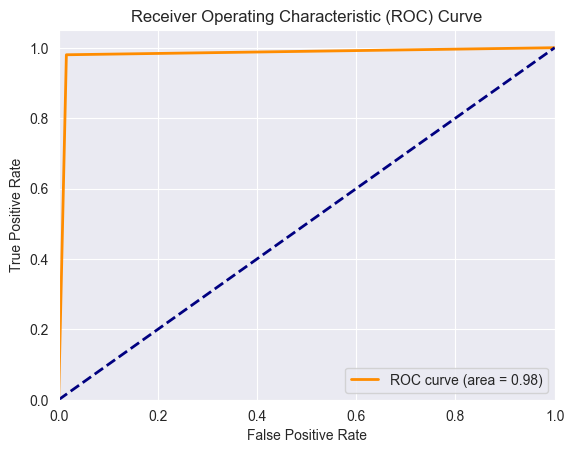

In [311]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_actual, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()